# Convolutional Neural Network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Preprocessing

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range=[-200,200],
                                   height_shift_range=0.5,
                                   rotation_range=90,
                                   horizontal_flip = True,
                                  vertical_flip=True)
training_set = train_datagen.flow_from_directory('datasets/train')

Found 90 images belonging to 3 classes.


In [3]:
"""
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True,
                                 vertical_flip=True)
"""
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('datasets/test')

Found 33 images belonging to 3 classes.


In [4]:
import matplotlib.image as img

In [5]:
training_set.image_shape

(256, 256, 3)

## Building the CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L2

In [7]:
cnn = Sequential()

In [8]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[256, 256, 3]))
BatchNormalization()

In [9]:
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [10]:
cnn.add(Conv2D(filters=32, kernel_size=3,kernel_regularizer =L2(l=0.01), activation='relu'))
BatchNormalization()
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Conv2D(filters=64, kernel_size=3,kernel_regularizer =L2(l=0.01), activation='relu'))
BatchNormalization()
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [11]:
cnn.add(Flatten())

In [12]:
cnn.add(Dense(64,kernel_regularizer =L2(l=0.01), activation='relu'))
"""
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(8, activation='relu'))
"""

"\ncnn.add(Dense(32, activation='relu'))\ncnn.add(Dense(16, activation='relu'))\ncnn.add(Dense(8, activation='relu'))\n"

In [13]:
cnn.add(Dense(3, activation='softmax'))

In [14]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
early_stop = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=25)

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 200,callbacks=[early_stop])

Epoch 1/200
3/3 [==============================] - 12s 4s/step - loss: 3.8192 - accuracy: 0.3113 - val_loss: 2.8886 - val_accuracy: 0.3030
Epoch 2/200
3/3 [==============================] - 7s 2s/step - loss: 2.9132 - accuracy: 0.3090 - val_loss: 2.3827 - val_accuracy: 0.3030
Epoch 3/200
3/3 [==============================] - 7s 2s/step - loss: 2.3466 - accuracy: 0.3076 - val_loss: 2.1714 - val_accuracy: 0.3030
Epoch 4/200
3/3 [==============================] - 7s 2s/step - loss: 2.1476 - accuracy: 0.4889 - val_loss: 2.1140 - val_accuracy: 0.4545
Epoch 5/200
3/3 [==============================] - 7s 2s/step - loss: 2.0897 - accuracy: 0.4710 - val_loss: 2.0331 - val_accuracy: 0.3939
Epoch 6/200
3/3 [==============================] - 7s 2s/step - loss: 2.0817 - accuracy: 0.4008 - val_loss: 1.9925 - val_accuracy: 0.4545
Epoch 7/200
3/3 [==============================] - 7s 2s/step - loss: 1.9762 - accuracy: 0.4465 - val_loss: 1.9302 - val_accuracy: 0.6061
Epoch 8/200
3/3 [================

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
modal_loss = pd.DataFrame(cnn.history.history)

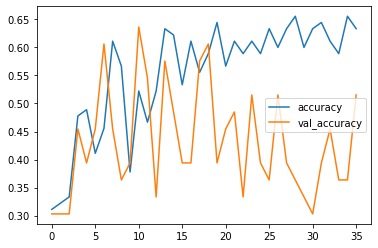

In [18]:
modal_loss[['accuracy','val_accuracy']].plot()

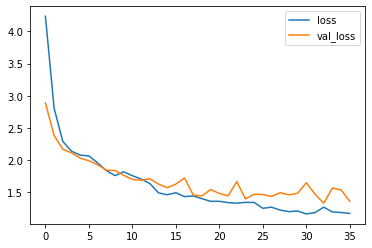

In [19]:
modal_loss[['loss','val_loss']].plot()

In [20]:
pred = cnn.predict_classes(test_set)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,pred))
print(confusion_matrix(test_set.classes,pred))

              precision    recall  f1-score   support

           0       0.25      0.40      0.31        10
           1       0.20      0.10      0.13        10
           2       0.25      0.23      0.24        13

    accuracy                           0.24        33
   macro avg       0.23      0.24      0.23        33
weighted avg       0.23      0.24      0.23        33

[[4 2 4]
 [4 1 5]
 [8 2 3]]


## Adding Dropout to decrease overfitting

In [22]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[256, 256, 3]))
BatchNormalization()
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Conv2D(filters=32, kernel_size=3,kernel_regularizer =L2(l=0.01), activation='relu'))
BatchNormalization()
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=3,kernel_regularizer =L2(l=0.01), activation='relu'))
BatchNormalization()
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Flatten())

cnn.add(Dense(64,kernel_regularizer =L2(l=0.01), activation='relu'))
cnn.add(Dropout(0.2))
"""
cnn.add(Dense(32, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(16, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(8, activation='relu'))
"""
cnn.add(Dense(3, activation='softmax'))

In [23]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 200,callbacks=[early_stop])

Epoch 1/200
3/3 [==============================] - 9s 3s/step - loss: 5.7291 - accuracy: 0.3931 - val_loss: 3.4732 - val_accuracy: 0.3939
Epoch 2/200
3/3 [==============================] - 7s 2s/step - loss: 3.1277 - accuracy: 0.3715 - val_loss: 2.3909 - val_accuracy: 0.3333
Epoch 3/200
3/3 [==============================] - 7s 2s/step - loss: 2.3688 - accuracy: 0.3914 - val_loss: 2.2683 - val_accuracy: 0.3939
Epoch 4/200
3/3 [==============================] - 7s 2s/step - loss: 2.3018 - accuracy: 0.3386 - val_loss: 2.2247 - val_accuracy: 0.3939
Epoch 5/200
3/3 [==============================] - 7s 2s/step - loss: 2.2246 - accuracy: 0.3941 - val_loss: 2.1773 - val_accuracy: 0.4242
Epoch 6/200
3/3 [==============================] - 7s 3s/step - loss: 2.1499 - accuracy: 0.4960 - val_loss: 2.0996 - val_accuracy: 0.4848
Epoch 7/200
3/3 [==============================] - 7s 2s/step - loss: 2.1028 - accuracy: 0.3875 - val_loss: 2.1346 - val_accuracy: 0.3030
Epoch 8/200
3/3 [=================

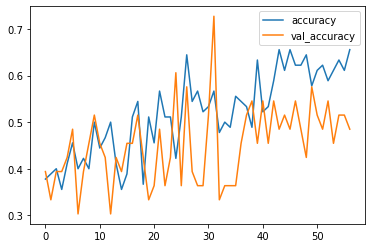

In [25]:
modal_loss = pd.DataFrame(cnn.history.history)
modal_loss[['accuracy','val_accuracy']].plot()

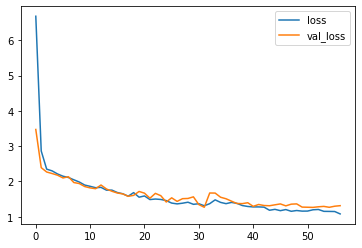

In [26]:
modal_loss[['loss','val_loss']].plot()

## Making a single prediction

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('datasets/rice_brown_leaf.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
training_set.class_indices

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [28]:
result

array([1], dtype=int64)

In [29]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Brown spot


In [30]:
test_image = image.load_img('datasets/rice_Leaf_smut.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)

In [31]:
result

array([2], dtype=int64)

In [32]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Leaf smut


In [33]:
test_image = image.load_img('datasets/rice_Leaf_smut1.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
result

array([1], dtype=int64)

In [34]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Brown spot


In [35]:
test_image = image.load_img('datasets/rice_Bacterial-leaf-blight.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
result

array([0], dtype=int64)

In [36]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Bacterial leaf blight


In [37]:
pred = cnn.predict_classes(test_set)

In [38]:
test_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

### predicted classes

In [39]:
pred

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1], dtype=int64)

### correct classes

In [40]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,pred))
print(confusion_matrix(test_set.classes,pred))

              precision    recall  f1-score   support

           0       0.29      0.60      0.39        10
           1       0.17      0.10      0.12        10
           2       0.50      0.23      0.32        13

    accuracy                           0.30        33
   macro avg       0.32      0.31      0.28        33
weighted avg       0.33      0.30      0.28        33

[[6 2 2]
 [8 1 1]
 [7 3 3]]


In [42]:
train_datagen

In [43]:
training_set

In [44]:
# confirm the iterator works
batchX, batchy = training_set.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 256, 256, 3), min=0.000, max=1.000


In [45]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)            

In [46]:
cnn.save('model-max.h5')

In [47]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(test_set.classes, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.28571429 0.16666667 0.5       ]
recall: [0.6        0.1        0.23076923]
fscore: [0.38709677 0.125      0.31578947]
support: [10 10 13]


In [53]:
_,acc = cnn.evaluate_generator(test_set,steps = len(test_set),verbose = 0)

In [54]:
print("test accouracy: %.3f" %(acc*100))

test accouracy: 48.485
